#### Mouse Cancer Studies: Observations and Insights

In [170]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [171]:
# Establish the csv file paths 
mouse_metadata_path = "/Users/ashleypatricia/Documents/GitHub/Matplotlib-challenge/Mouse_metadata.csv"
study_results_path = "/Users/ashleypatricia/Documents/GitHub/Matplotlib-challenge/Pymaceuticals_data_Study_results.csv"

# Read the mouse data as csv files and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
print(mouse_metadata_df.head())
print(study_results_df.head())

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="outer")

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [172]:
# Check the number of mice (without considering duplicates)
totmice = merged_df["Mouse ID"].count()
print(f"The total number of mice involved in the study, not considering for duplicates, is {totmice}.")

# Checking the unique number of mice
unique = merged_df["Mouse ID"].unique()
micenum = len(unique)
print(f"The total number of unique mice included in the study is {micenum}.")



The total number of mice involved in the study, not considering for duplicates, is 1893.
The total number of unique mice included in the study is 249.


In [173]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dropped_results = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"])]
# dropped_results
dropped_results["Mouse ID"].value_counts()

g989    5
Name: Mouse ID, dtype: int64

In [174]:
# Optional: Get all the data for the duplicate mouse ID. 
dropped_data = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
dropped_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [175]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_results_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
dropped_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [176]:
# Checking the number of mice in the clean DataFrame.
clean = merged_df.loc[merged_df["Mouse ID"] != "g989", :]
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [177]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = clean["Drug Regimen"].unique()
regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimine_mean = clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].mean()
regimine_median = clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].median()
regimine_var = clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].var()
regimine_std = clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].std()
regimine_sem = clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
stats_df = pd.DataFrame({"Tumor Volume Mean": regimine_mean, "Tumor Volume Median": regimine_median, "Tumor Volume Variance": regimine_var, "Tumor Volume St. Dev": regimine_std, "Total Volume SEM": regimine_sem})
stats_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume St. Dev,Total Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [178]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen using the aggregation method (produce the same summary statistics in a single line)
aggregate = clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Regimen Administrations Per Regimen'}, xlabel='Regimen', ylabel='Number of Times Administered'>

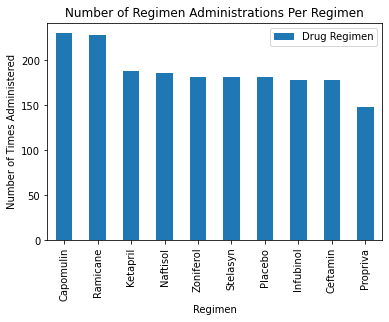

In [179]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen = clean["Drug Regimen"].unique()
regimen2 = clean["Drug Regimen"].value_counts()

plotdata_df = pd.DataFrame({"Drug Regimen": regimen2})
plotdata_df.plot(kind="bar", title="Number of Regimen Administrations Per Regimen", ylabel="Number of Times Administered", xlabel="Regimen")



<function matplotlib.pyplot.show(close=None, block=None)>

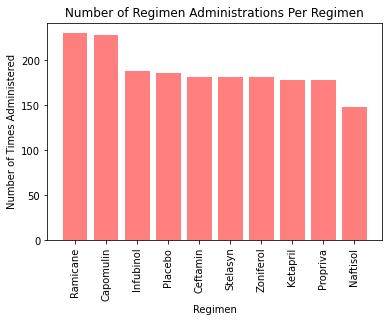

In [180]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen = clean["Drug Regimen"].unique()
regimen2 = clean["Drug Regimen"].value_counts()

plt.bar(regimen, regimen2, color="r", alpha=0.5, align="center")
plt.title("Number of Regimen Administrations Per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Times Administered")
plt.xticks(regimen, rotation="vertical")
plt.show


<AxesSubplot:title={'center':'Proportion of Male and Female Mice'}, ylabel='Sex'>

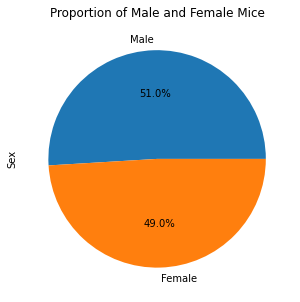

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_df = clean["Sex"].value_counts()
mouse_sex_df.plot.pie(y="Sex", figsize=(5, 5), title="Proportion of Male and Female Mice", autopct="%1.1f%%")

Text(0.5, 1.0, 'Proportion of Male and Female Mice')

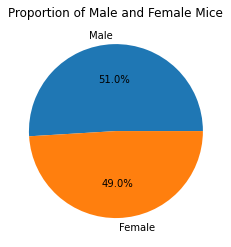

In [182]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
mouse_sex = clean["Sex"].value_counts()

plt.pie(mouse_sex, labels=labels, autopct="%1.1f%%")
plt.title("Proportion of Male and Female Mice")


## Quartiles, Outliers and Boxplots

In [204]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
groupedmice = clean.groupby(["Mouse ID"])
timepoints_df = pd.DataFrame(groupedmice["Timepoint"].max()).reset_index()
timepoints_df
# Check the number of each max timepoint 
print(timepoints_df["Timepoint"].value_counts())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean, timepoints_df, on=["Mouse ID", "Timepoint"], how="right")
merged_df

# Drop duplicates of Mouse IDs
dup_df = merged_df.drop_duplicates("Mouse ID")
dup_df

# See if value counts here match above
#print(dup_df["Timepoint"].value_counts())


45    130
30     17
10     16
5      15
40     12
25     12
15     12
0      12
35     11
20     11
Name: Timepoint, dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [184]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [185]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [186]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [187]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [188]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
